I have run the logistic regression on iris dataset. i am clear till this code. 
after this i want to form the equation to score the test data 
i know i can use predict function to score the test 
however i want to see the parameters and respective weights

In [48]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib 

In [49]:
iris = datasets.load_iris()

In [50]:
X = iris.data
y = iris.target

In [51]:
X.shape

(150, 4)

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [56]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [58]:
print(X_train.shape)
print(X_test.shape)


(105, 4)
(45, 4)


In [59]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)


In [60]:
lr = LogisticRegression(C = 1000, random_state=0)
lr.fit(X_train_std, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ -3.32077901   4.32683432 -12.81210361 -10.64766757]
 [  5.21650589  -0.18763145 -13.92366746  -2.01391647]
 [ -1.89572688  -4.13920287  26.73577107  12.66158403]]
[  4.0085677   13.93949498 -17.94806268]


In [61]:
y_predicted_test=lr.predict(sc.transform(X_test))
print(y_predicted_test.shape)

(45,)


In [62]:
y_predicted_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [63]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_predicted_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [66]:
score = accuracy_score(y_test, y_predicted_test)
score

0.9777777777777777

In [67]:
number_of_ground_truth_1=50
number_of_ground_truth_0=50
number_of_predicted_1=3
number_of_corrected_1=2
number_of_predicted_0=97
number_of_corrected_0=49
true_positives=2
true_negatives=49
false_positives=1
false_negatives=48

'''
    RECALL - WE ARE LOOKING ON GROUND TRUTH 1, AND HOW MUCH % OF THEM ARE PREDICTED CORRECTLY
'''

recall = number_of_corrected_1/number_of_ground_truth_1=2/50
recall = true_positives/true_positives+false_negatives=2/(2+48)

'''
    PRECISION - WE ARE LOOKING ON PREDICTED 1, AND HOW MUCH % OF THEM ARE COINSIDE WITH GT (GROUND TRUTH)
'''

precision = number_of_corrected_1/number_of_predicted_1 = 2/3
precision = true_positives/true_positives+false_positives =2/(2+1)

'''
    ACCURACY(ACC) - NUMBER OF CORRECTED PREDICTIONS/NUMBER OF ALL PREDICTIONS
'''
acc=(number_of_corrected_1+number_of_corrected_0)/(number_of_predicted_1+number_of_predicted_0) = (2+49)/(3+97)
acc=(true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives) = (2+49)/(2+49+1+48)

'''
    IF WE HAVE DISBALANCED CLASSES, FOR EXAMPLE, 0(10) AND 1(90), THAN WE CAN PREDICT ALL 0 AND HAVE ACC 90%. 
    IT'S BAD, IF OUR 1 IS A NON PAYMENT CREDIT. SO ACC IS NOT GOOD METRIC IN SUCH CASE.
    THE BETTER METRIC IN SUCH CASE IS F1_score - MEAN (середнє значення) BETWEEN PRECISION AND RECALL
'''
 
F1_score = harmonic_mean(precision, recall) = 2/(1/precision + 1/recall)




SyntaxError: cannot assign to operator (<ipython-input-67-d00697a79ba5>, line 16)

In [68]:
y_setosa=list(map(lambda x:1 if x==0 else 0, y))
print(y_setosa)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### SETOSA

In [69]:
y_setosa=[1 if element==0 else 0 for element in y] 
print(y_setosa)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, test_size = 0.3, random_state = 0)

In [71]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [72]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
test_pred=model.predict(X_test)

In [74]:
cm=confusion_matrix(y_test, test_pred)
print(cm)

[[29  0]
 [ 0 16]]


In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1])

In [76]:
test_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1])

<AxesSubplot:>

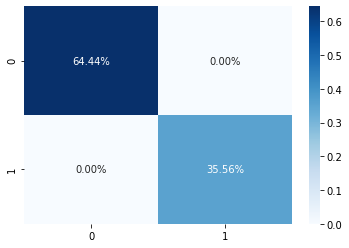

In [77]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [78]:
print(classification_report(y_test, test_pred, target_names=['Other Iris Flower', 'Setosa']))

                   precision    recall  f1-score   support

Other Iris Flower       1.00      1.00      1.00        29
           Setosa       1.00      1.00      1.00        16

         accuracy                           1.00        45
        macro avg       1.00      1.00      1.00        45
     weighted avg       1.00      1.00      1.00        45



### VERSICOLOR 

In [79]:
y_versicolor=[1 if element==1 else 0 for element in y] 
print(y_versicolor)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [90]:
y_not_versicolor=[0 if element==1 else 1 for element in y] 
print(y_not_versicolor)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y_not_versicolor, test_size = 0.2, random_state = 0)

In [97]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
test_pred=model.predict(X_test)

In [99]:
cm=confusion_matrix(y_test, test_pred)
print(cm)

[[ 4  9]
 [ 1 16]]


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y_versicolor, test_size = 0.3, random_state = 0)

In [122]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
test_pred=model.predict(X_test)

In [124]:
cm=confusion_matrix(y_test, test_pred)
print(cm)

[[26  1]
 [15  3]]


<AxesSubplot:>

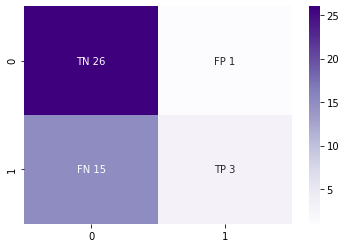

In [125]:
labels = [f"TN {cm[0,0]}", f"FP {cm[0,1]}", f"FN {cm[1,0]}", f"TP {cm[1,1]}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, 
             fmt='', cmap='Purples')


In [126]:
recall = 3/(3+15)
print(recall)
precision = 3/(3+1)
print(precision)
f1_score= 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.16666666666666666
0.75
0.27272727272727276


In [127]:
###порахувати для 0го класу precision, recall, f1

recall = 26/(26+1)
print(recall)
precision = 26/(26+15)
print(precision)
f1_score= 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.9629629629629629
0.6341463414634146
0.7647058823529412


In [128]:
print(classification_report(y_test, test_pred, target_names=['Other Iris Flower', 'Versicolor']))

                   precision    recall  f1-score   support

Other Iris Flower       0.63      0.96      0.76        27
       Versicolor       0.75      0.17      0.27        18

         accuracy                           0.64        45
        macro avg       0.69      0.56      0.52        45
     weighted avg       0.68      0.64      0.57        45



In [129]:
print(classification_report(y_test, test_pred, target_names=['Versicolor', 'Other Iris Flower']))

                   precision    recall  f1-score   support

       Versicolor       0.63      0.96      0.76        27
Other Iris Flower       0.75      0.17      0.27        18

         accuracy                           0.64        45
        macro avg       0.69      0.56      0.52        45
     weighted avg       0.68      0.64      0.57        45



In [130]:
# trying another method - Decision TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [131]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
filename = 'versicolor_recommender.sav'
joblib.dump(model, 'versicolor_recommender.sav')

['versicolor_recommender.sav']

In [133]:
predictions_dt = model.predict(X_test)

In [134]:
cm=confusion_matrix(y_test, predictions_dt)
print(cm)

[[27  0]
 [ 1 17]]


[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.424\nsamples = 105\nvalue = [73, 32]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [39, 32]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [36, 1]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0

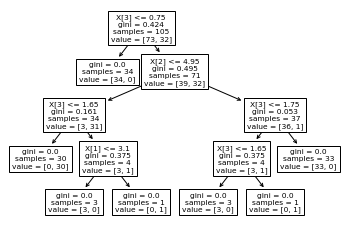

In [135]:
tree.plot_tree(model)

In [136]:
# from sklearn.tree import export_graphviz
# tree.export_graphviz(model, out_file='versicolor_recommender.dot',
#                     feature_names=None,
#                     class_names=None,
#                     label='all',  
#                     rounded=True,
#                     filled=True)
# $ dot -Tpng tree.dot -o tree.png  

In [ ]:
# import graphviz
# with open("versicolor_recommender.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

### VIRGINICA 

In [ ]:
y_virginica=[1 if element==2 else 0 for element in y] 
print(y_virginica)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_virginica, test_size = 0.3, random_state = 0)

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
test_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test, test_pred)
print(cm)

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test, test_pred, target_names=['Other Iris Flower', 'Virginica']))

In [ ]:
s1=100 km
s2=100 km
t1=1 hour
t2=2 hours
v1=100/1=100 km/h
v2=100/2=50 km/h
v_mean=(s1+s2)/(t1+t2)=(100+100)/(1+2)=66.7
v_mean_not_correct=(v1+v2)/2=(100+50)/2=75
harmonic_mean_v1_v2=2/(1/v1+1/v2)=2/(1/100+1/50)=66.7